# 카카오톡 대화 사용자별 빈도 분석

In [1]:
import pickle
from pprint import pprint
import pandas as pd
import nltk
from wordcloud import WordCloud

In [2]:
# load data
with open("data/cleaned_katalk_data.pk", "rb") as f:
    data = pickle.load(f)
    
print(data.head())
print(data.info())

                date user                                            message
0  2016. 3. 7. 15:41   YH  안녕하세요 이게 빠르지 않을까 해서요 엠티 관련해서는 회장님께서 이미 밴드에 올려 ...
1  2016. 3. 7. 15:51   WH                                           네 안녕하세요 
2  2016. 3. 7. 17:14   YH  넵 저희 카톡방을 만들어서 거기다 투표를 돌릴까요 아님 그냥 밴드에 두개로 할까요 총무님
3  2016. 3. 7. 17:21   KS                            엠티관련해서 참석여부 투표를 말씀하신건가요
4  2016. 3. 7. 17:22   YH                       네 저희 이번 토욜 관련해서도 투표를 올려야 해서요
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14911 entries, 0 to 14910
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     14911 non-null  object
 1   user     14911 non-null  object
 2   message  14911 non-null  object
dtypes: object(3)
memory usage: 349.6+ KB
None


In [3]:
users = set(data["user"])
users

{'BJ', 'BR', 'GM', 'HL', 'KS', 'WH', 'YH'}

In [4]:
# group by user
authors = data.groupby('user')

print(type(authors.groups))

pprint(authors.groups)   # user별 메시지의 인덱스

<class 'pandas.io.formats.printing.PrettyDict'>
{'BJ': Int64Index([ 1161,  1162,  1164,  1168,  1169,  1173,  1179,  1180,  1181,
             1185,
            ...
            14857, 14859, 14863, 14864, 14877, 14878, 14880, 14883, 14885,
            14886],
           dtype='int64', length=4222),
 'BR': Int64Index([   23,    25,    32,    54,    77,    78,    79,    80,    83,
               84,
            ...
            14887, 14890, 14892, 14893, 14896, 14901, 14902, 14904, 14906,
            14910],
           dtype='int64', length=2824),
 'GM': Int64Index([  272,   351,   405,   564,   652,   715,   736,   814,   821,
              904,
            ...
            14671, 14674, 14676, 14680, 14684, 14688, 14691, 14695, 14697,
            14700],
           dtype='int64', length=554),
 'HL': Int64Index([   19,    20,    49,    50,    52,    55,    57,   115,   116,
              118,
            ...
            14871, 14876, 14888, 14889, 14891, 14895, 14897, 14899, 14903,
     

In [5]:
# 데이터 형태를 list로 변환
author2doc = {}

for user, index in authors.groups.items():
    author2doc[user] = list(index)
    
print(author2doc['WH'])

[1, 18, 26, 30, 38, 39, 41, 42, 43, 45, 51, 53, 58, 60, 63, 64, 66, 67, 69, 71, 74, 75, 81, 82, 87, 96, 100, 101, 103, 104, 111, 114, 135, 151, 189, 190, 201, 203, 206, 209, 213, 217, 222, 226, 232, 237, 250, 251, 252, 253, 255, 257, 267, 279, 282, 283, 286, 302, 305, 307, 309, 314, 319, 321, 322, 325, 328, 329, 336, 350, 356, 364, 367, 368, 372, 378, 385, 392, 395, 425, 428, 440, 444, 445, 450, 469, 472, 476, 480, 481, 483, 580, 585, 608, 753, 758, 761, 763, 764, 766, 770, 773, 776, 777, 779, 784, 790, 806, 822, 879, 882, 884, 886, 887, 890, 892, 894, 896, 897, 899, 903, 907, 953, 973, 976, 1056, 1057, 1066, 1072, 1074, 1076, 1077, 1093, 1098, 1138, 1140, 1256, 1282, 1288, 1303, 1308, 1313, 1319, 1343, 1344, 1352, 1364, 1490, 1583, 1585, 1615, 1742, 1760, 1779, 1786, 1800, 1815, 1828, 1851, 1856, 1859, 2008, 2027, 2059, 2071, 2081, 2084, 2098, 2106, 2112, 2132, 2145, 2220, 2224, 2253, 2261, 2272, 2275, 2303, 2313, 2318, 2319, 2322, 2355, 2363, 2690, 2704, 2724, 2726, 3378, 3384, 3385,

In [6]:
user1_msg = [str(data["message"][idx]) for idx in author2doc['BJ']]
user1_msg[-20:]

['그르치',
 '부끄',
 '방학',
 '아아아아',
 '방학이 생기는데',
 '저거생기면',
 '하루가 날라간다',
 '나 좀 똑똑하지',
 '옆에서 조용히 해야겠당 ',
 '그럼 우릴 티칭해죵',
 '웅',
 '무슨말이얌',
 '30살되면',
 '야 하는거야',
 '30살이랑 야랑',
 '먼관계가 있눈지',
 '설명좀 해주실뿐',
 '아아아 ',
 '한살뒤에',
 '꾸뤠']

In [7]:
# 해당 사용자의 단어별 빈도 분석
total_tokens = [token for doc in user1_msg for token in doc.split()]

print(len(total_tokens))

8761


In [8]:
text = nltk.Text(total_tokens)

print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

6139
[('아', 54),
 ('나', 50),
 ('근데', 49),
 ('우리', 46),
 ('누나', 44),
 ('형', 42),
 ('내가', 36),
 ('다', 31),
 ('다들', 30),
 ('헐', 30)]


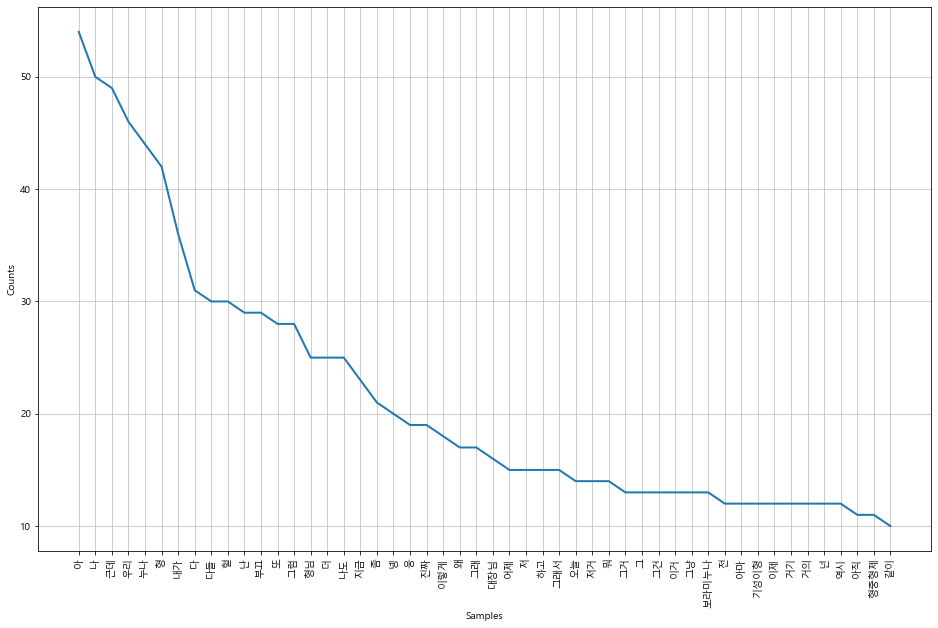

In [9]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

plt.figure(figsize=(16, 10))
text.plot(50)

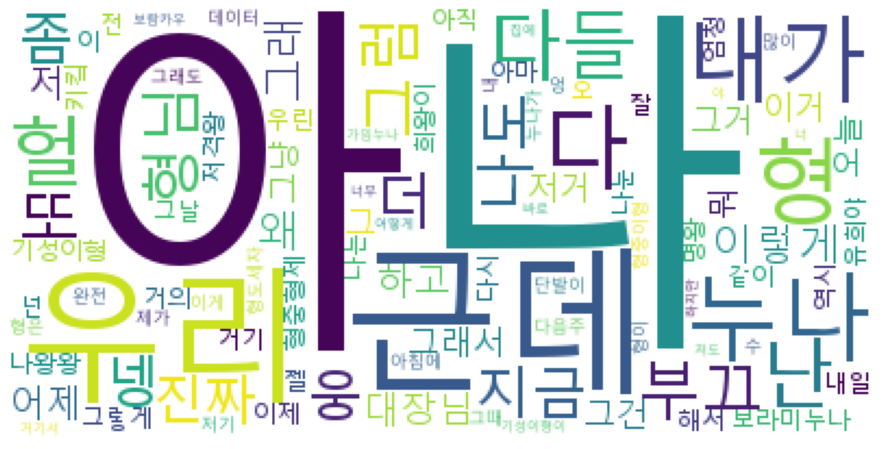

In [10]:
wc = text.vocab().most_common(100)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### 위 내용을 하나의 함수로 묶음

In [11]:
def user_freq_analysis(username, data, author2doc):
    
    user_msg = [str(data["message"][idx]) for idx in author2doc[username]]
    total_tokens = [token for doc in user_msg for token in doc.split()]
    text = nltk.Text(total_tokens, name='kakao')

    #pprint(text.vocab().most_common(10))
    
    path = "c:/Windows/Fonts/malgun.ttf"
    if platform.system() == 'Darwin':
        rc('font', family='AppleGothic')
    elif platform.system() == 'Windows':
        font_name = font_manager.FontProperties(fname=path).get_name()
        rc('font', family=font_name)
    else:
        print('Unknown system... sorry~~~~')

    plt.figure(figsize=(16, 10))
    text.plot(50)

    wc = text.vocab().most_common(100)

    # for Mac : font_path='/Library/Fonts/AppleGothic.ttf'
    wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                          relative_scaling = 0.2,
                          #stopwords=STOPWORDS,
                          background_color='white',
                          ).generate_from_frequencies(dict(wc))
    
    plt.figure(figsize=(16,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

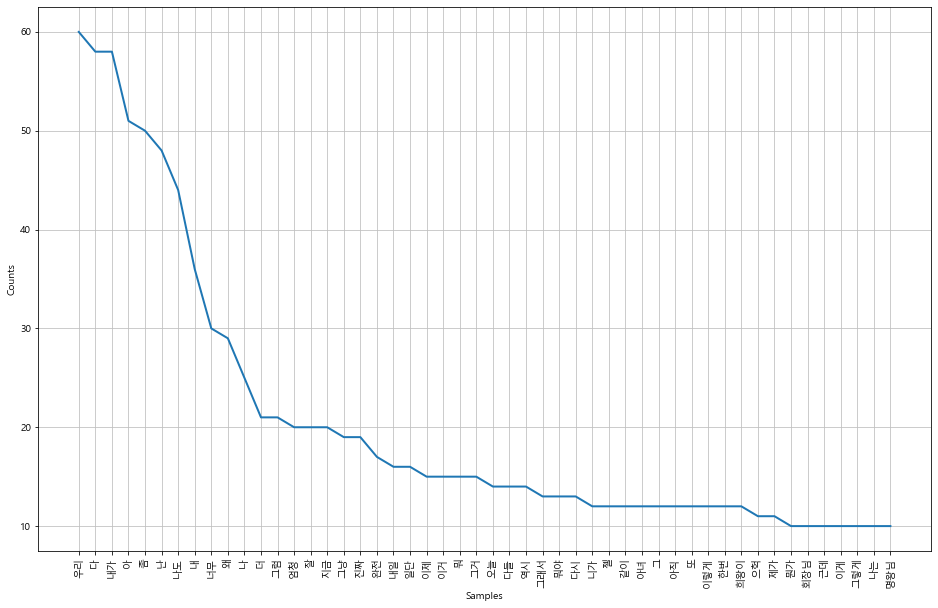

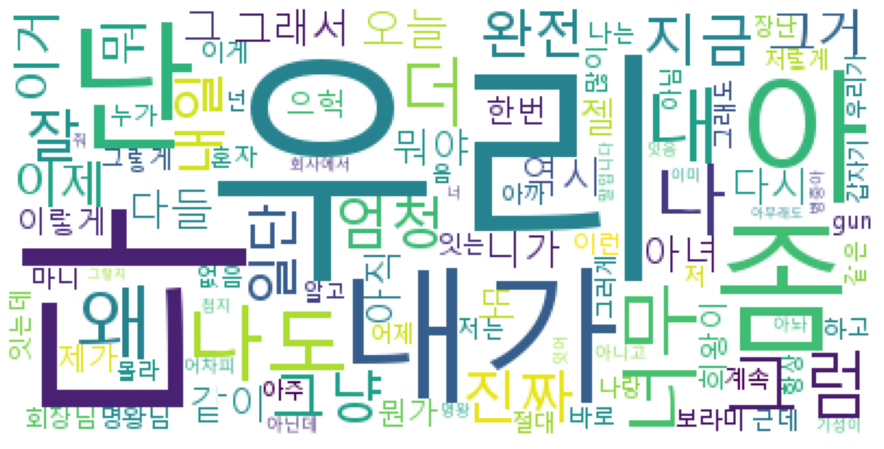

In [12]:
user_freq_analysis("HL", data, author2doc)